# Titanic Dataset

In this iphython notebook, we are going to take a look at the Titanic dataset provided on Kaggle.com and investigate the information recorded from 891 passengers on board. We are going to examine the survival rate of various groups of passengers, look into the 3 different ticket classes more closely, as they represent the socio-economic status of the passengers, and also analyze the female passengers in more detail.

First let's take a quick look at the colums of the dataset and get some stat from each numerical column.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [54]:
titanic_df = pd.read_csv("titanic-data.csv")

In [55]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


One thing that is revealed from looking at the dataset stat is that there are a lot of missing rows in the "Age" column. We will have to deal with this later in our analysis.

It is also interesting to see that there are tickets recorded in the dataset with the price of $0 and also the fact that there was such a large range in the ticket prices. The standard deviation of *49.7* which is about 1.5 times the average is an indicator of the significant variation of fare for Titainic.

# 1. Investigating Survival Probability

In the first section of this analysis, we are going to take a look at the different characteristics of passengers and analyze the survival probability based on these characteristics. Specifically, we are interested in the age, ticket class, and sex of passengers. 

## _1.1 Age_ 

As mentioned before, it looks like that there are some missing data in the Age column, 177 datapoints to be exact. In order to analyze the age of survived vs not-survived people, we will find the median age in each group of passengers divided by ticket class and sex (6 groups: [1, male] [2, male] [3, male] [1, female] [2, female] [3, female]) and replace the missing ages in each group with the median age in that group using the _Transform_ feature of pandas. There are 2 advantages to this method. First, this way we are not losing a significant portion of our data. Second, replacing with median values in each group miminizes the likelihood of skewing the data to the extent that impacts the data negatively. 

The other thing that needs to be done to enhance our analysis is to divide the passengers into multiple age groups. Below are the four age groups based on which, we divided up the passengers.


__1. Child:__ less than 10

__2. Young:__ 10-30

__3. Middle Age:__ 30-50

__4. Old:__ above 50


First, let's take a look at the distribution of different age groups on board using a pie chart.

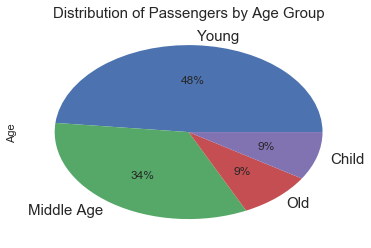

In [70]:
titanic_df.groupby(["Pclass", "Sex"])["Age"].transform(lambda x: x.fillna(x.median()))  # Replace missing ages with median age in each group of passegner divided by sex and class
bins = [0, 10, 30, 50, 100]   # Define the 4 age groups mentioned above
age_group_names = ['Child', 'Young', 'Middle Age', 'Old']  # Assign a name to each age group
age_categories = pd.cut(titanic_df['Age'], bins, labels = age_group_names) # Divide the passengers into 4 age groups
age_categories.value_counts().plot(kind='pie', autopct='%1.0f%%') 
plt.title("Distribution of Passengers by Age Group", size = 15)

The pie chart above shows that young people (age group 10-30)  made up almost half of the passengers. Also there were about as many children as old people on board. 

Now let's look at what was the survival rate in each age group. To do this, we are going to write a function that can also be used when we are investigating survival rate based on sex and ticket class. The function sums up the survival column for each group of passengers (since survival has been denoted by putting value 1 or 0 in this column for each passenger), divides the result by the total number of passengers in each group and then outputs a bar graph to display the results.

In [58]:
# Function to plot a bar graph to display the survival probability based on 
#differen factors (Age, Sex, and Ticket Class) and survival rate. The function
# gets the groupby object, number of categories /groups on the graph,
# the names of the groups, title of the chart and the list of colors used for the bars as input
def bar_graph(grouped_by, number_of_groups, group_names, title, group_color):
    x = np.arange(number_of_groups)
    y_survived = grouped_by.sum()['Survived'] / grouped_by.count()['Survived']
    plt.bar(x, y_survived, color = group_color, width = 0.5, tick_label = group_names)
    plt.ylim(ymax = 1)  #adjust the scale of y axis
    plt.title("Survival Probability by "+ title, size = 15)
    plt.rc('xtick', labelsize = 15) # adjust the size of x axis labels
    plt.ylabel("Probability")

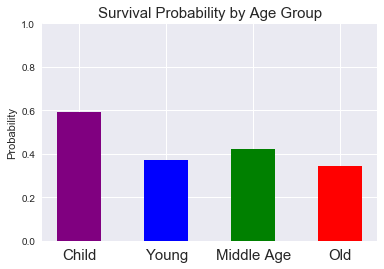

In [69]:
grouped_by_Age = titanic_df.groupby(age_categories) # Create a groupby object based on age categories created above
age_color = ["purple", "blue", "green", "red"]  # Assign a color to each group for the bar chart
bar_graph(grouped_by_Age, 4, age_group_names, "Age Group", age_color)

We can clearly see that the survival rate among children (about 60%) was much higher than the other age groups. This outcome is expected as in any incident, the first priority usually goes to saving children. 
On the other hand, old people had the lowest survival probability (about 35%), which is a little surprising. Was this due to the fact that people put older passengers at the last priority to save or survival took a certain level of physical ability that older people lacked? Or maybe other factors like sex and ticket class played a stronger role?

## _1.2 Sex_

Next, we are going to look at sex as a factor that could impact the rate of survival. The pie chart below shows what percentage of passengers on board were male and what percentage were female.

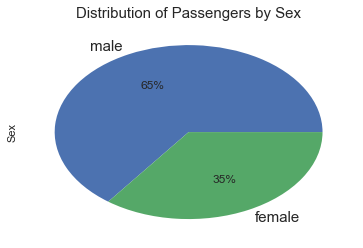

In [60]:
titanic_df["Sex"].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title("Distribution of Passengers by Sex", size = 15) 

Survival probablity of each group can be analyzed using the __bar_graph__ function.

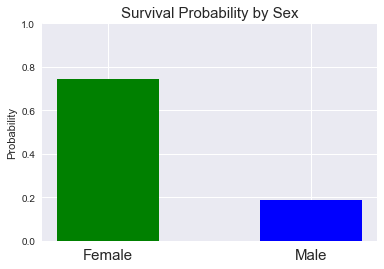

In [61]:
gender_names = ["Female", "Male"]
grouped_by_sex = titanic_df.groupby('Sex') # Create a groupby object based on sex
sex_color = ["green", "blue"]  # Assign a color to each gender for the bar chart
bar_graph(grouped_by_sex, 2, gender_names, "Sex", sex_color)

The bar graph shows a surprising difference between female and male survival probability. Approximately out of every 5 male passengers on board, only 1 was survived (about 20% survival chance); Whereas among female passengers, the survival chance was much higher. Out of every 4 female passengers 3 were survived! Although it was expected to see that the first priority goes to saving women in this situation, it is interesting to see the degree of difference between male and female. 

## 1.3 _Ticket Class_

Next, we are going to investigate the survival probability based on the passengers ticket class. In this dataset, each passenger's ticket class is representative of his/her socio-economic status meaning that ticket classes 1,2, and 3 represent upper class, middle class, and lower class respectively. It will be interesting to see if there is any meaningful difference between the survival probibility of passengers in different classes.

Just like the last section, we are going to first take a look at the distribution of passengers based on their ticket class using a pie chart.

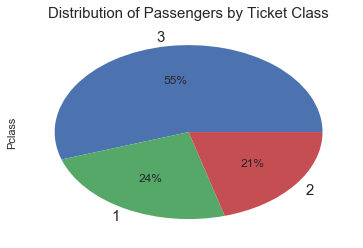

In [62]:
titanic_df["Pclass"].value_counts().plot(kind="pie", autopct='%1.0f%%')
plt.title("Distribution of Passengers by Ticket Class", size = 15)

Based on the pie chart above, the majority of passengers (over half) had ticekt class 3, meaning that they were from the lower class. The rest of the passengers were almost equally split between the middle class and upper class. Now we can analyze the survival probability of each class of passengers using the same function that we defined above.

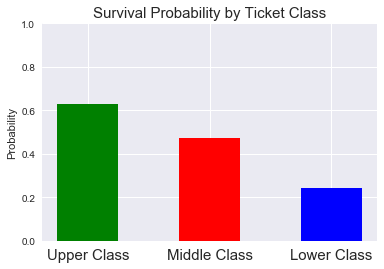

In [63]:
class_names = ["Upper Class", "Middle Class", "Lower Class"] # Assign a name to each class of passengers
grouped_by_SES = titanic_df.groupby('Pclass') # Create a groupby object based on ticket class
class_color = ["green", "red", "blue"]        # Assign a color to each ticket class for the bar chart
bar_graph(grouped_by_SES, 3, class_names, "Ticket Class", class_color)

The results above are aligned with the expectation that people from the upper class had the highest probability of surviving (about 62%), which is almost 2.5 times more likely than lower class passengers. This could be due to the fact that upper class passengers had cabins in locations of the ship that had better access to the main deck or maybe these passengers were provided with emergency equipment that would work better in this type of situation. Of course
again, we also have to consider the possibility of other passenger characteristics playing an important role here.

Although further statistical analysis in needed to test the significance of the difference between lower class and upper class survival probability, the above analysis indicates a difference large enough to claim that ticket class was most likely one of the main factors that could predict a passenger's survival or non-survival. In the next section, we are going to take a closer look at the three ticket classes and try to investigate the passengers within each ticket class. 

# 2. Investigating Ticket Classes
As mentioned before, we can determine the socio-economic status of each passenger from their ticket class with a high level of confidence. In this section of the analysis, we would like to answer questions regarding this factor and find out, within each ticket class, what was the fare range and what was the distribution of passengers like from each port of embarkation ((Cherbourg, Queenstown, Southampton) , and also what was the distribution of female and male passegners.


## _2.1 Ticket price within each class_

The first thing that we are going to look at is the price of tickets that the passengers from each class paid for. Using a box plot will clearly show us a comparison of the spread of ticket prices within each class. Earlier, we saw a somewhat high variation in the Fare column and a significant range between the min and max prices in the first part of the notebook. Since this is probably going to skew the _average_ fare in each class, instead we are going to look at the _median_ price as a representative number for each ticket class.

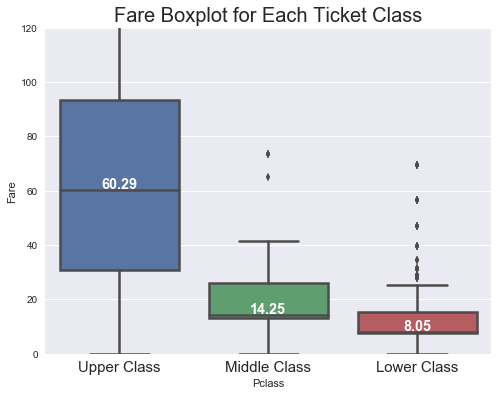

In [64]:
# Adjusting the size of the chart
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

# creating the boxplot using seaborn library
sns.boxplot(x = titanic_df['Pclass'], y = titanic_df["Fare"], linewidth = 2.5)

# Get medians and display them on the chart  (code extracted from stackoverflow.com)
medians = grouped_by_SES.median()["Fare"].values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='large', color='w', weight='semibold')

   
plt.ylim(0,120)  # Adjust the scale of y axis
plt.xticks(plt.xticks()[0], class_names) # Assign a label for each bar on x axis
plt.title("Fare Boxplot for Each Ticket Class", size = 20)

The median price in each class is displayed on the boxplot above. We can see that the price range was comparable between lower class and middle class, whereas the upper class ticket prices were significantly higher, to the extent that the lower quartile of upper class prices is even higher than the upper quartile of middle and lower classes. The other difference is that we can see a much larger interquartile range within the upper class tickets compared to the other two. As stated before, there are tickets with $0 price in all three classes. Further investigation is required to understand the reason behind this as well.

## _2.2 The socio-economic status of passengers from different origins_

Next let's look at passengers from different embarkation ports and find out how many passengers from each class got on board.

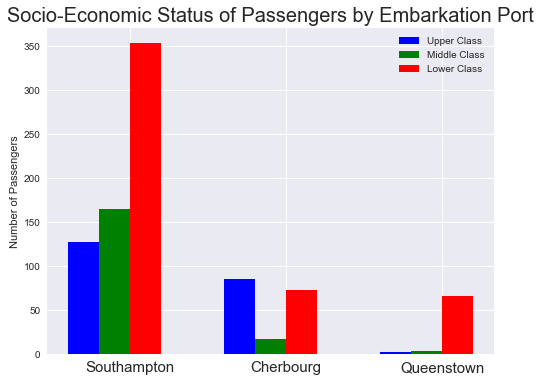

In [65]:
# Access the number of passengers from each port and each ticket class
ticket_class1 = titanic_df.loc[titanic_df["Pclass"] == 1]["Embarked"].value_counts()
ticket_class2 = titanic_df.loc[titanic_df["Pclass"] == 2]["Embarked"].value_counts()
ticket_class3 = titanic_df.loc[titanic_df["Pclass"] == 3]["Embarked"].value_counts()

ports = ["Southampton", "Cherbourg", "Queenstown"]  # Set the names of x axis

# Adjust the size of the chart
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

# Create the bar graph of the data
x = np.arange(3)
plt.bar(x, ticket_class1, label="Upper Class", color = "blue", width = 0.2, tick_label = ports, align = "edge")
plt.bar(x+0.2, ticket_class2, label="Middle Class", color="green", width = 0.2, tick_label = ports, align = "edge")
plt.bar(x+0.4, ticket_class3, label="Lower Class", color = "red", width = 0.2, tick_label = ports, align = "edge")
plt.legend()
plt.title("Socio-Economic Status of Passengers by Embarkation Port", size = 20)
plt.ylabel("Number of Passengers")

Based on the bar graph above, it looks like Cherbourg was the only place from which most passengers had first class tickets and there were few middle class passengers compared to the other two classes. Both Southampton passengers (which made up most of the people on board) and Queenstown passengers were mostly from lower class. 

## _2.3 The socio-economic status of male and female passengers_

The last part of the ticket class investigation is about comparing the ratio of male and female passengers on board within each class.

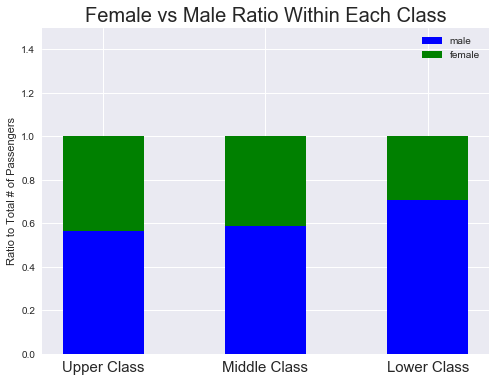

In [66]:
# Create a function to return the ratio of the frequency of each value in a series to the length of the series
def sex_ratio (series):
    return series.value_counts() / series.count()

# Apply the sex_ratio function to get the ratio of men and women in each ticket class
ratio = titanic_df.groupby("Pclass", as_index = False)["Sex"].apply(sex_ratio)

# Adjust the size of the chart
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

# Create the stacked bar graph of male and female data
x= np.arange(3)
plt.bar(x, ratio["male"] , color = "blue", width = 0.5, label = "male", tick_label = class_names)
plt.bar(x, ratio["female"] , color = "green", width = 0.5, label = "female", bottom = ratio["male"],
        tick_label = class_names)
plt.legend()
plt.ylim(0,1.5)  # Adjust the scale of y axis
plt.title("Female vs Male Ratio Within Each Class", size = 20)
plt.ylabel("Ratio to Total # of Passengers")

As you can see, the ticket class that had the highest ratio of female passengers among all classes was the upper class (about 45% of the tickets in this class belonged to female passengers). The ratio of female passengers in the middle class is very close to the upper class (about 40%). However, within the lower class, male passengers made up about 70% of the class and only 30% of the passengers were female.

In the final section of this analysis, we are going to take a closer look at female passengers on board and try to gain more insight into this group of passengers.

# 3. Investigating Married vs Unmarried Female Passengers

Overall, there is not much information that can be extracted from the Name column in the dataset. However, there is one thing that can be looked at through the names of the female passengers and that is identifying who was married and who was not. The key here is to look for the word "Mrs." for married and "Miss." for unmarried in female passengers' names. In this final section, we are interested in comparing the age, ticket price, and number of family members on baord (children, parents, siblings, spouse and fiance) between these two groups. For this analysis, we are only going to look at unmarried women above 18 years old.

In [67]:
# Extract the married female passenger rows
married_w = titanic_df.loc[(titanic_df["Name"].str.count("Mrs") == 1)] 

print "MARRIED: "
print "Count: {}".format(married_w["Age"].count())
average_M_age = round(married_w["Age"].mean(), 1) # Calculate average age and round to 1 decimal point
print "Average Age: {}".format(average_M_age)
print "Min Age: {}".format(married_w["Age"].min())
print "Max Age: {}".format(married_w["Age"].max())
average_M_Fare = round(married_w["Fare"].mean(), 1) # Calculate average fare and round to 1 decimal point
print "Average Fare: ${}".format(average_M_Fare)
print "Average number of immediate family aboard: {}".format((married_w["Parch"] + married_w["SibSp"]).mean())
print "Min number of immediate family aboard: {}".format((married_w["Parch"] + married_w["SibSp"]).min())
print "Max number of immediate family aboard: {}".format((married_w["Parch"] + married_w["SibSp"]).max())
print "# of married women traveling without family: {}".format(married_w.loc
                                                               [(married_w["Parch"] + married_w["SibSp"]) == 0].count()["Name"])

MARRIED: 
Count: 112
Average Age: 35.6
Min Age: 14.0
Max Age: 63.0
Average Fare: $44.7
Average number of immediate family aboard: 1.48837209302
Min number of immediate family aboard: 0
Max number of immediate family aboard: 7
# of married women traveling without family: 23


In [68]:
# Extract the unmarried female passenger rows who are above 18
unmarried_w = titanic_df.loc[(titanic_df["Name"].str.count("Miss") == 1) & (titanic_df["Age"]>18)]

print "UNMARRIED (ABOVE 18): "
print "Count: {}".format(unmarried_w["Age"].count())
average_UM_age = round(unmarried_w["Age"].mean(), 1) # Calculate average age and round to 1 decimal point
print "Average Age: {}".format(average_UM_age)
print "Min Age: {}".format(unmarried_w["Age"].min())
print "Max Age: {}".format(unmarried_w["Age"].max())
average_UM_Fare = round(unmarried_w["Fare"].mean(), 1) # Calculate average fare and round to 1 decimal point
print "Average Fare: ${}".format(average_UM_Fare)
print "Average number of immediate family aboard: {}".format((unmarried_w["Parch"] + unmarried_w["SibSp"]).mean())
print "Min number of immediate family aboard: {}".format((unmarried_w["Parch"] + unmarried_w["SibSp"]).min())
print "Max number of immediate family aboard: {}".format((unmarried_w["Parch"] + unmarried_w["SibSp"]).max())


UNMARRIED (ABOVE 18): 
Count: 85
Average Age: 30.0
Min Age: 19.0
Max Age: 63.0
Average Fare: $61.2
Average number of immediate family aboard: 0.517647058824
Min number of immediate family aboard: 0
Max number of immediate family aboard: 5


Two points stand out in the analysis above. The first one is that the average fare for the 85 unmarried female passengers above 18 years old is about $17 more expensive than the 112 married women (61.2 dollars for unmarried vs 44.7 dollars for married), which tells us that unmarried passengers were generally from higher classes (otherwise you would think that married passengers could afford to buy more expensive tickets than unmarried). 

The other point is that there was at least 1 married female passenger on board with age 14, which is really strange!

The number of immediate family members on board are somewhat as expected, in that, on average, married female passengers have about 3 times more family members than unmarried female passengers. The only interesting thing is that there were 23 married women who were traveling without their husbands on board.

# Conclusion

The analysis that was done above on the survival rate of different groups of passengers presents a one dimensional picture about the role that passengers’ age, sex, and ticket class could have had in their survival. None of the conclusions above mean that there is a direct causation relationship between the mentioned factors and survival rate. To come up with a more holistic conclusion, we need to use machine learning methods to combine the mentioned factors and create a prediction model for passengers’ survival. Further analysis also needs to include statistical hypothesis testing to examine the significance of the results.

In the ticket class investigation, an assumption was made that every ticket class can represent the socio-economic status of the passenger. While this can be true for most cases, it is important to keep in mind that some passengers might have bought tickets that are not in line with their socio-economic status. Also, the data did not really provide us with any insight on why the price range for 1st class tickets is much wider than the other two ticket classes. Further investigation is required to answer this question.
